In [1]:
!git clone https://github.com/greatsong/2020_public_data_analysis

Cloning into '2020_public_data_analysis'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 61 (delta 24), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (61/61), done.


In [2]:
cd 2020_public_data_analysis

/content/2020_public_data_analysis


In [3]:
!apt -qq -y install fonts-nanum

The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144579 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [4]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()

In [ ]:
# 위 코드 실행 후 [메뉴] - [런타임] - [런타임 다시 시작] - [예]

## #0. 어떤 과정을 거치면 우리 동네 인구구조와 가장 비슷한 지역을 찾을 수 있을까?
### 1) 계획대로 한 번에 완성되는 경우는 아주 아주 드물다(없다고 보면 된다)
### 2) 일단 가장 기본적인 부분(minimum viable product)부터 작게 만들어보고 점점 확대시켜나가는 것이 일반적
### 3) trial & error를 통해 배우며 성장하는 것이 핵심

## #1. '신도림' 이라는 이름이 포함된 지역의 인구 구조 그래프 그리기

In [ ]:
import csv
f = open('age2007.csv', encoding = 'cp949')

data = csv.reader(f)
result = []
for row in data :
    if '신도림' in row[0] :
        for i in range(3,len(row)) : 
            result.append(int(row[i]))
            
import matplotlib.pyplot as plt
plt.plot(result)
plt.show()

## #2. 다른 지역과의 비교를 위해 비율로 표현하기

In [ ]:
import csv
f = open('age2007.csv', encoding = 'cp949')

data = csv.reader(f)
result = []
for row in data :
    if '신도림' in row[0] :
        for i in range(3,len(row)) : 
            result.append(int(row[i])/int(row[2]))
            
import matplotlib.pyplot as plt
plt.plot(result)
plt.show()

## #3. 데이터의 재사용을 위해 list 형태로 만들기(feat. next(data))

In [ ]:
import csv
f = open('age2007.csv', encoding = 'cp949')

data = csv.reader(f)
next(data)
next(data)
data = list(data)

## #4. $$s = \sum 기준 지역의 해당 연령값 - 각 지역의 해당 연령값$$

In [ ]:
import csv
f = open('age2007.csv', encoding = 'cp949')

data = csv.reader(f)
next(data)
next(data)
data = list(data)
pivot = []
for row in data :
    if '신도림' in row[0] :
        for i in range(3,len(row)) : 
            pivot.append(int(row[i])/int(row[2]))
mn = 10000000

for row in data :
    s = 0
    for i in range(3, len(row)) :
        tmp = int(row[i]) - pivot[i-3]
        s = s + tmp
    if s < mn :
        result = []
        for i in range(3, len(row)) :
            result.append(int(row[i])/int(row[2]))
            
            
import matplotlib.pyplot as plt
plt.plot(pivot)
plt.plot(result)
plt.show()

## #5. $$s = \sum (기준 지역의 해당 연령값 - 각 지역의 해당 연령값) ^2 $$

In [ ]:
import csv
f = open('age2007.csv', encoding = 'cp949')

data = csv.reader(f)
next(data)
next(data)
data = list(data)
pivot = []
for row in data :
    if '신도림' in row[0] :
        for i in range(3,len(row)) : 
            pivot.append(int(row[i])/int(row[2]))
mn = 1

for row in data :
    s = 0
    for i in range(3, len(row)) :
        row[i] = int(row[i])/int(row[2])
        tmp = (row[i] - pivot[i-3]) ** 2
        s = s + tmp
    if s < mn :
        result = []
        for i in range(3, len(row)) :
            result.append(row[i])
        mn = s
            
import matplotlib.pyplot as plt
plt.plot(pivot)
plt.plot(result)
plt.show()

## #6. '신도림동'을 제외한 결과 출력하기

In [ ]:
import csv
f = open('age2007.csv', encoding = 'cp949')

data = csv.reader(f)
next(data)
next(data)
data = list(data)
pivot = []

for row in data :
    if '신도림' in row[0] :
        for i in range(3,len(row)) : 
            pivot.append(int(row[i])/int(row[2]))
mn = 1

for row in data :
    s = 0
    for i in range(3, len(row)) :
        row[i] = int(row[i])/int(row[2])
        tmp = (row[i] - pivot[i-3]) ** 2
        s = s + tmp
    if s < mn and ('신도림동' not in row[0]) :
        result = []
        for i in range(3, len(row)) :
            result.append(row[i])
        mn = s
        print(s)
            
            
import matplotlib.pyplot as plt
plt.plot(pivot)
plt.plot(result)
plt.show()

## #7. 궁금한 지역의 이름 입력하기

In [ ]:
import csv
f = open('age2007.csv', encoding = 'cp949')

data = csv.reader(f)
next(data)
next(data)
data = list(data)
pivot = []

name = input('궁금한 지역 이름을 입력해주세요 : ')

for row in data :
    if name in row[0] :
        for i in range(3,len(row)) : 
            pivot.append(int(row[i])/int(row[2]))
mn = 1

for row in data :
    s = 0
    for i in range(3, len(row)) :
        row[i] = int(row[i])/int(row[2])
        tmp = (row[i] - pivot[i-3]) ** 2
        s = s + tmp
    if s < mn and (name not in row[0]) :
        result = []
        for i in range(3, len(row)) :
            result.append(row[i])
        mn = s            
            
import matplotlib.pyplot as plt
plt.plot(pivot)
plt.plot(result)
plt.show()

## #8. 범례 추가하기

In [ ]:
import csv
f = open('age2007.csv', encoding = 'cp949')

data = csv.reader(f)
next(data)
next(data)
data = list(data)
pivot = []

name = input('궁금한 지역 이름을 입력해주세요 : ')

for row in data :
    if name in row[0] :
        for i in range(3,len(row)) : 
            pivot.append(int(row[i])/int(row[2]))
mn = 1

for row in data :
    s = 0
    for i in range(3, len(row)) :
        row[i] = int(row[i])/int(row[2])
        tmp = (row[i] - pivot[i-3]) ** 2
        s = s + tmp
    if s < mn and (name not in row[0]) :
        result = []
        for i in range(3, len(row)) :
            result.append(row[i])
        mn = s            
        result_name = row[0]
            
import matplotlib.pyplot as plt
plt.plot(pivot, label = name)
plt.plot(result, label = result_name)
plt.legend()
plt.show()

In [4]:
cd 2020_public_data_analysis

/content/2020_public_data_analysis


## #9. 한글 폰트 추가하기

궁금한 지역 이름을 입력해주세요 : 신도림동


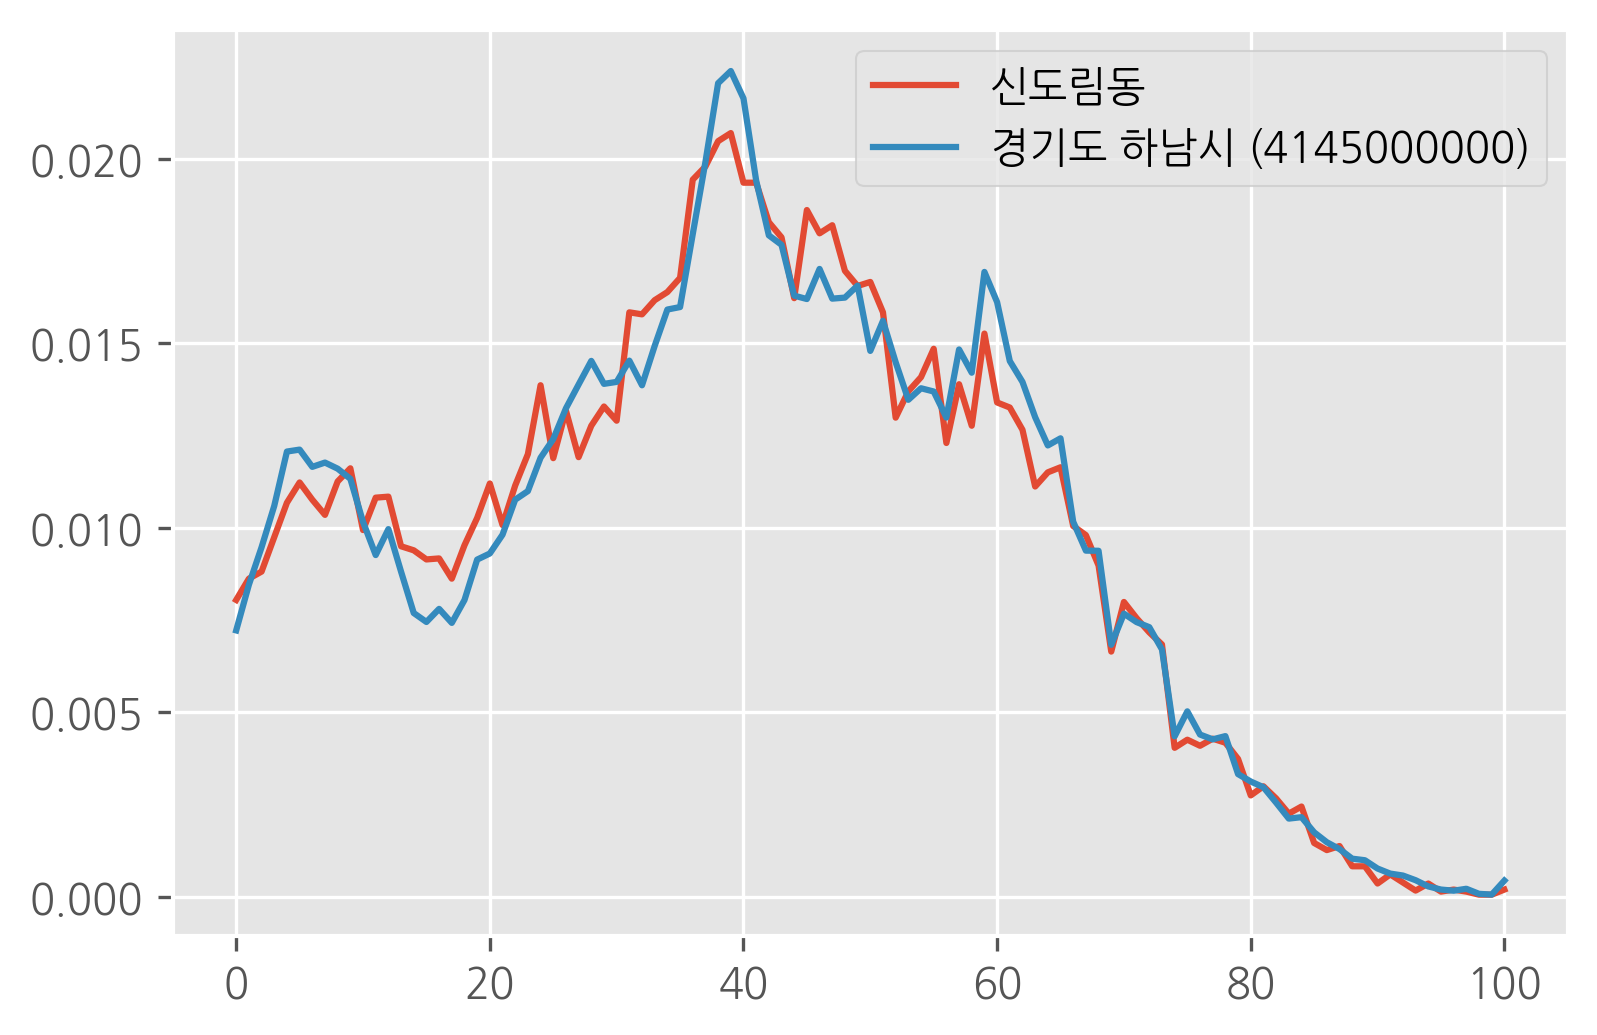

In [7]:
import csv
f = open('age2007.csv', encoding = 'cp949')

data = csv.reader(f)
next(data)
next(data)
data = list(data)
pivot = []

name = input('궁금한 지역 이름을 입력해주세요 : ')

for row in data :
    if name in row[0] :
        for i in range(3,len(row)) : 
            pivot.append(int(row[i])/int(row[2]))
        break
mn = 1

for row in data :
    s = 0
    for i in range(3, len(row)) :
        row[i] = int(row[i])/int(row[2])
        tmp = (row[i] - pivot[i-3]) ** 2
        s = s + tmp
    if s < mn and (name not in row[0]) :
        result = []
        for i in range(3, len(row)) :
            result.append(row[i])
        mn = s            
        result_name = row[0]
            
import matplotlib.pyplot as plt
plt.figure(dpi = 300)
plt.style.use('ggplot')
plt.rc('font', family = 'NanumGothic')
plt.plot(pivot, label = name)
plt.plot(result, label = result_name)
plt.legend()
plt.show()

In [5]:
ls

'코랩사용법(200824_송석리).ipynb'
 201806subway.csv
'2019년 03월  교통카드 통계자료.xls'
 2019_2020_3_4월_초미세먼지데이터비교.ipynb
'2020년 03월  교통카드 통계자료.xls'
 202005subway.csv
'2020 우리 동네 인구구조와 가장 비슷한 지역 찾기 프로젝트 소개(200824_cp949).ipynb'
'2020 데이터분석 실습 파일(200824_cp949).ipynb'
'2020 파이썬 병아리반(200824).ipynb'
'2020 지하철 프로젝트_cp949.ipynb'
 age2007.csv
 age.csv
 age_gender.csv
 읍면동연령별.csv
 dustDetailInfo_2019_03.csv
 dustDetailInfo_2019_03.xls
 dustDetailInfo_2019_04.csv
 dustDetailInfo_2019_04.xls
 dustDetailInfo_2020_03.csv
 dustDetailInfo_2020_03.xls
 dustDetailInfo_2020_04.csv
 dustDetailInfo_2020_04.xls
'우리나라는 점점 여름과 겨울이 길어지고 있을까.ipynb'
 README.md
 seoul_temp.csv
 subway1903.csv
 subway2003.csv
 ta_20200721103344.csv
